# Coordinate Reference Systems for mapping applications: Venus

**_A companion to the CRS introduction for the 2024 GMAP Winter School_**

Basemaps for such environment are available either as web services (e.g. WMS, via OWSLIB or alike), or embedded in certain packages, e.g. see:

* https://docs.planetary-coverage.org/en/latest/maps/index.html
* https://docs.planetary-coverage.org/en/latest/_modules/planetary_coverage/maps/map.html

One can customise the maps e.g. with https://docs.planetary-coverage.org/en/stable/maps/index.html#customize-the-map. 

Or one can load data (see e.g. [first crs notebook for this school](./0_crs_intro.ipynb)

In [1]:
# if you run yourself the notebook, please feel free reinstate the warnings,
# commenting this cell

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# # warnings.filterwarnings(action='once')

In [2]:
import matplotlib.pyplot as plt

from planetary_coverage import VENUS

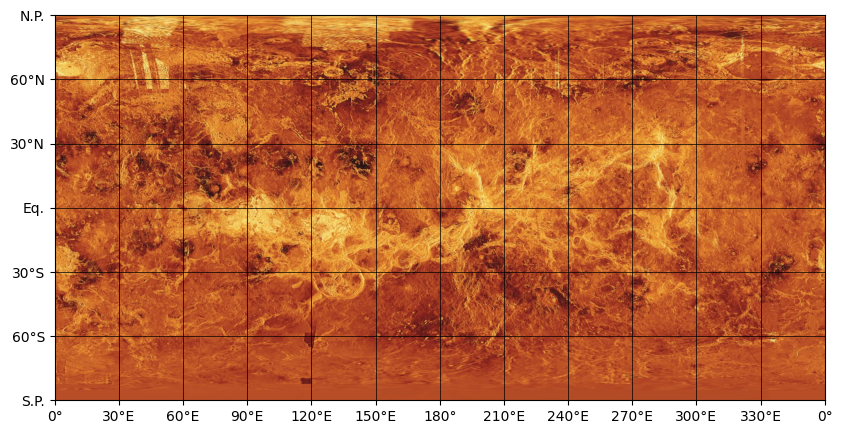

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection=VENUS)

Another approach would be, e.g. in this case using just a browse (same caevats apply, see LINK TO FIRST NOTEBOOK)

https://astrogeology.usgs.gov/search/map/Venus/Magellan/Venus_Magellan_C3-MDIR_Global_Mosaic_2025m

In [4]:
import pyproj

In [5]:
pyproj.get_authorities()


['EPSG', 'ESRI', 'IAU_2015', 'IGNF', 'NKG', 'OGC', 'PROJ']

A practical way (see also UTILITIES LINKS TBA) to search for CRSs is the function below, both for direct and inverse lookup

In [6]:
def search_iau(string=""):
    """
    Direct and inverse IAU search, Works also with substrings.
    
    Usage: e.g. 
    
        search_iau("Mars") # direct lookup
        
        search_iau("50255") # inverse lookup, by IAU 2015 CRS code
        
    If nothing is returned, there is no match
    """
    import pyproj
    import pandas as pd
    crs_info_list = pyproj.database.query_crs_info(auth_name="IAU_2015", pj_types=None)
    crs_df = pd.DataFrame (data=crs_info_list, columns=["auth_name", "code", "name", "type", "deprecated", "area_of_use", "projection_method_name"])
    
    if string.isnumeric():
        print("it's a IAU code (hopefully)")
        bubu = crs_df.query ('code.str.contains (@string)')
        if len(bubu) == 0:
            print("nothing returned, please check the spelling")
        return bubu

    if string.isalpha():
        print("it's a Solar System body name (hopefully)")
        bubu = crs_df.query ('name.str.contains (@string)')
        if len(bubu) == 0:
            return("nothing returned, please check the spelling")
        return bubu
        

In [7]:
# Searching for venus CRSs and assigning to a variable (dataframe)
venus_crs_set = search_iau("Venus")

it's a Solar System body name (hopefully)


In [8]:
# Plotting the first row, typically the first include the geographic "Sphere/Ocentric" CRS, 
# to be eventually used by cartopy, or so
venus_crs_set.head(2)

,auth_name,code,name,type,deprecated,area_of_use,projection_method_name
72,IAU_2015,29900,Venus (2015) - Sphere / Ocentric,PJType.GEOGRAPHIC_2D_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",None
73,IAU_2015,29910,Venus (2015) - Sphere / Ocentric / Equirectang...,PJType.PROJECTED_CRS,False,"(-180.0, -90.0, 180.0, 90.0, Not specified.)",Equidistant Cylindrical


In [9]:
pyproj.CRS('IAU_2015:29900').to_wkt()

# The radius is included in the query below or one can always do

# pyproj.CRS('IAU_2015:29900').to_proj4() # Uncomment to have the proj4 code of the CRS above


'GEOGCRS["Venus (2015) - Sphere / Ocentric",DATUM["Venus (2015) - Sphere",ELLIPSOID["Venus (2015) - Sphere",6051800,0,LENGTHUNIT["metre",1]],ANCHOR["Ariadne: 0.0"]],PRIMEM["Reference Meridian",0,ANGLEUNIT["degree",0.0174532925199433]],CS[ellipsoidal,2],AXIS["geodetic latitude (Lat)",north,ORDER[1],ANGLEUNIT["degree",0.0174532925199433]],AXIS["geodetic longitude (Lon)",east,ORDER[2],ANGLEUNIT["degree",0.0174532925199433]],ID["IAU",29900,2015],REMARK["Source of IAU Coordinate systems: https://doi.org/10.1007/s10569-017-9805-5"]]'

In [10]:
# This has been documented on an earlier notebook

import cartopy
cartopy.crs.Geodetic().proj4_init

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

venus_globe = ccrs.Globe(semimajor_axis = 6051800, semiminor_axis = 6051800, ellipse = None, datum = None)

projection = ccrs.Orthographic(globe = venus_globe)
# data_crs   = ccrs.Geodetic(globe = venus_globe)

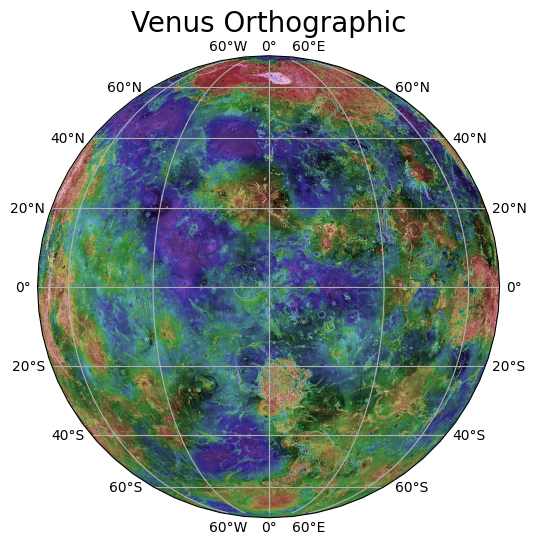

In [11]:
import requests
import shutil 
import os
os.environ["PROJ_IGNORE_CELESTIAL_BODY"] = "YES"

url = "https://astropedia.astrogeology.usgs.gov/download/Venus/Magellan/RadarProperties/Colorized/thumbs/Venus_Magellan_C3-MDIR_ClrTopo_Global_Mosaic_6600m.jpg"
output_file = "./venus.jpg"
with requests.get(url, stream=True) as response, open(output_file, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.gridlines(draw_labels=True)

# this would work for polygons but NOT for points ;-|
# ax.add_geometries(moon_linear.geometry, data_crs, edgecolor='yellow', facecolor='none') # for Lat/Lon data.

# ax.scatter([gdf.geometry.x for point in points],
#            [gdf.geometry.y for point in points],
#            transform=ccrs.Geodetic(),
#            facecolor='yellow')

img = plt.imread(output_file )
img = img[::-1]
ax.imshow(img, origin='lower', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])


plt.title('Venus Orthographic', fontsize=20)
plt.show()
os.remove(output_file)


Loading vector files over the map (again, all very easy with Desktop GIS...) is possible, using the same approach of LINK TO FIRST NOTEBOOK.

e.g. data from 

https://astrogeology.usgs.gov/search/map/Venus/Geology/Bethelletal2019_Map

<img src="https://astropedia.astrogeology.usgs.gov/download/Venus/Geology/ancillary/Bethelletal2019_Map_1024.jpg" width="300"> 

the zip archive is at

https://planetarymaps.usgs.gov/mosaic/Venus/Geology/Venus_GIS_Geological_Map_of_the_V-32_Quadrangle_Bethell_v1.zip

The file is far too large to open it directly, so one can download locally and load one of the layers


In [12]:
import geopandas

url = "https://planetarymaps.usgs.gov/mosaic/Venus/Geology/Venus_GIS_Geological_Map_of_the_V-32_Quadrangle_Bethell_v1.zip"
local_venus_extensional_file = "./data/extensionallineaments.shp"
# Works great if reading shapefile set from disk directly:
venus_linear = geopandas.read_file(local_venus_extensional_file)

In [13]:
# The shapefile had also a .prj, therefore the CRS is automatically loaded
venus_linear.crs

<Projected CRS: PROJCS["Sinusoidal_VENUSAlphaRegio",GEOGCS["GCS_VE ...>
Name: Sinusoidal_VENUSAlphaRegio
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Sinusoidal
Datum: D_VENUS
- Ellipsoid: VENUS
- Prime Meridian: Reference_Meridian

In [14]:
venus_linear.crs.to_proj4()

'+proj=sinu +lon_0=15 +x_0=0 +y_0=0 +R=6051800 +units=m +no_defs +type=crs'

In [15]:
projection = ccrs.Robinson(globe = venus_globe)

# class cartopy.crs.Sinusoidal(central_longitude=0.0, false_easting=0.0, false_northing=0.0, globe=None)

data_crs   = ccrs.Sinusoidal(central_longitude=15.0, globe = venus_globe)

Please note it might take few tens of seconds, as the shapefile is reasonably large


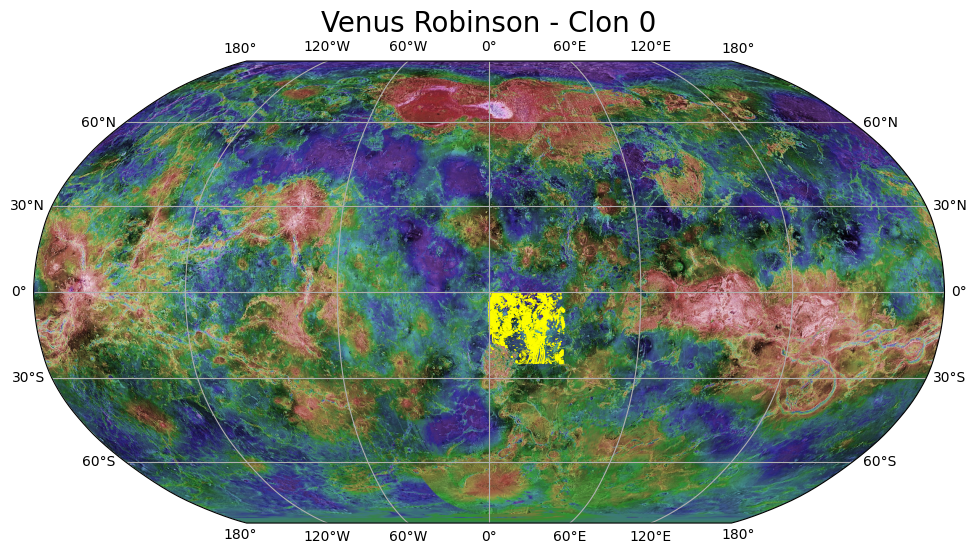

In [16]:
import requests
import shutil 
import os
os.environ["PROJ_IGNORE_CELESTIAL_BODY"] = "YES"

url = "https://astropedia.astrogeology.usgs.gov/download/Venus/Magellan/RadarProperties/Colorized/thumbs/Venus_Magellan_C3-MDIR_ClrTopo_Global_Mosaic_6600m.jpg"
output_file = "./venus.jpg"
with requests.get(url, stream=True) as response, open(output_file, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=projection)
ax.set_global()
ax.gridlines(draw_labels=True)

# this would work for polygons but NOT for points ;-|
ax.add_geometries(venus_linear.geometry, data_crs, edgecolor='yellow', facecolor='none') # for Lat/Lon data.

# ax.scatter([gdf.geometry.x for point in points],
#            [gdf.geometry.y for point in points],
#            transform=ccrs.Geodetic(),
#            facecolor='yellow')

img = plt.imread(output_file )
img = img[::-1]
ax.imshow(img, origin='lower', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])


plt.title('Venus Robinson - Clon 0', fontsize=20)
plt.show()
os.remove(output_file)


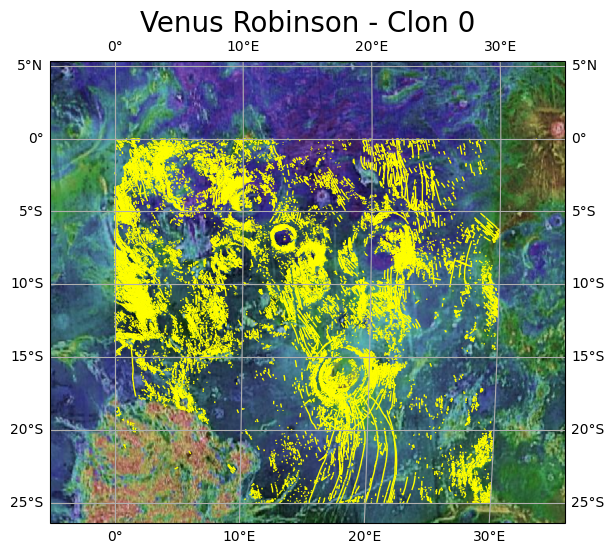

In [17]:
import requests
import shutil 
import os
os.environ["PROJ_IGNORE_CELESTIAL_BODY"] = "YES"

url = "https://astropedia.astrogeology.usgs.gov/download/Venus/Magellan/RadarProperties/Colorized/thumbs/Venus_Magellan_C3-MDIR_ClrTopo_Global_Mosaic_6600m.jpg"
output_file = "./venus.jpg"
with requests.get(url, stream=True) as response, open(output_file, 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=projection, extent=[-5, 35, -25, 5])
# ax.set_global()
ax.gridlines(draw_labels=True)

# this would work for polygons but NOT for points ;-|
ax.add_geometries(venus_linear.geometry, data_crs, edgecolor='yellow', facecolor='none') # for Lat/Lon data.

# ax.scatter([gdf.geometry.x for point in points],
#            [gdf.geometry.y for point in points],
#            transform=ccrs.Geodetic(),
#            facecolor='yellow')

img = plt.imread(output_file )
img = img[::-1]
ax.imshow(img, origin='lower', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])


plt.title('Venus Robinson - Clon 0', fontsize=20)
plt.show()
os.remove(output_file)


## References

References quoted in this notebook or relevant for the content are listed below. They are collected and collated with others on the repository: 

https://github.com/europlanet-gmap/winter-school-2024/tree/main/crs

--- 
Annex et al., (2020). SpiceyPy: a Pythonic Wrapper for the SPICE Toolkit. Journal of Open Source Software, 5(46), 2050, https://doi.org/10.21105/joss.02050

Archinal, B.A., Acton, C.H., A’Hearn, M.F. et al. Report of the IAU Working Group on Cartographic Coordinates and Rotational Elements: 2015. Celest Mech Dyn Astr 130, 22 (2018). https://doi.org/10.1007/s10569-017-9805-5

Bethell, E. M. Ernst, R. E., Samson, C., 2019 Geology of the Alpha Regio (V-32) Quadrangle, Venus, Journal of Maps, 15:2, 474-486, DOI: 10.1080/17445647.2019.1614489.

Elson, P., et al. (2023). SciTools/cartopy: v0.22.0 (v0.22.0). Zenodo. https://doi.org/10.5281/zenodo.8216315

Hare, T. M., & Malapert, J. C. (2021). Standards Proposal for 2021 to Support Planetary Coordinate Reference Systems for Open Geospatial Web Services. LPI Contributions, 2549, 7012 - http://voparis-vespa-crs.obspm.fr:8080/web/ - http://www.opengis.net/def/crs/IAU/2015

Herrick, R. R. , Stahlke, D. L. , Sharpton, V. L., 2012. Fine-scale venusian topography from Magellan stereo data. Eos, Transactions American Geophysical Union , 93 , 125–126. DOI: 10.1029/2012EO120002

Seignovert et al. (2023) Planetary coverage package (1.1.0), [planetary-coverage.org](https://docs.planetary-coverage.org/en/1.1.0/), [swh:1:rel:f6280865fc5144b4beadc04d4085385f7a58491d](https://archive.softwareheritage.org/browse/origin/directory/?origin_url=https://juigitlab.esac.esa.int/python/planetary-coverage&release=1.1.0)

Snyder (1987) Map projections: A working manual - https://pubs.er.usgs.gov/publication/pp1395 / https://doi.org/10.3133/pp1395


## Links and internet resources

* Spicepy - https://pypi.org/project/spicepy/
  * https://github.com/AndrewAnnex/SpiceyPy
* Planetary-coverage python package - https://docs.planetary-coverage.org
  * https://juigitlab.esac.esa.int/python/planetary-coverage